In [2]:
from shapely.geometry import Polygon,MultiPolygon
from freetype import *
import mytools
import geopandas as gpd

In [3]:
text = '公'
face = Face('c:/Windows/Fonts/msyh.ttc')
flags = FT_LOAD_DEFAULT | FT_LOAD_NO_BITMAP
face.set_char_size( 32*64  )
face.load_char(text, flags )
slot = face.glyph
outline = slot.outline
point_list = outline.points
polygon_list = []
i = 0
for x in outline.contours[:]:
    polygon_list.append(Polygon(point_list[i:x+1]))
    i = x + 1
print(f'文字由{outline.n_contours}个多边形组成，一共有{outline.n_points}顶点，每个里面由几个顶点组成',outline.contours)

文字由3个多边形组成，一共有36顶点，每个里面由几个顶点组成 [21, 28, 35]


In [4]:
pol_list = []
len_num = len(polygon_list)
range_lise = iter(range(len_num))
for x in range_lise:
    print(x)
    if (x == i) | (x == len_num-1):
        pol_list.append(polygon_list[x])
        continue
    if polygon_list[x].contains(polygon_list[x+1]):
        polygon_list[x] = polygon_list[x].difference(polygon_list[x+1])
        print(f'第{x+1}个多变形包含了,第{x+2}个多边形,删除第{x+2}个.')
        i = x + 1
    else:
        pol_list.append(polygon_list[x])
    print(x)

0
0
1
1
2


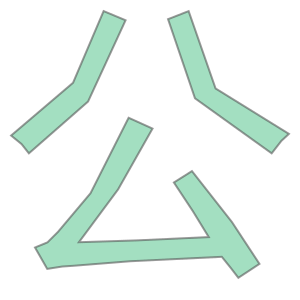

In [5]:
MultiPolygon(polygon_list)

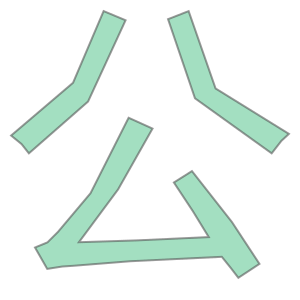

In [6]:
MultiPolygon(pol_list)

In [7]:
#导出数据
res_gdf = gpd.GeoDataFrame(pol_list).rename(columns={0:'geometry'})
res_gdf = gpd.GeoDataFrame(res_gdf,crs="epsg:4326",geometry='geometry')
res_gdf.to_file('d:/yyy.shp',encoding='gbk')    

In [264]:
a = [1,2,3,4,5,88]

In [266]:
a.pop(5)

88

In [267]:
a

[1, 2, 3, 4, 5]

0
2
4
6
8


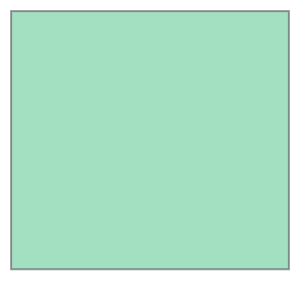

In [206]:
polygon_list[x+1]

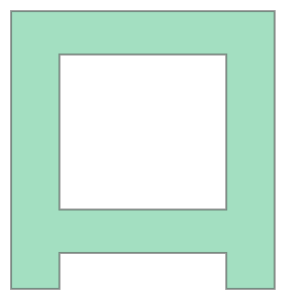

In [196]:
polygon_list[x]

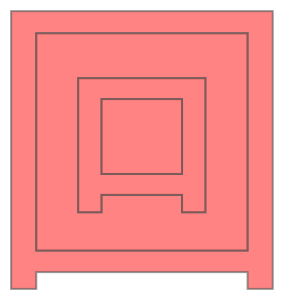

In [197]:
MultiPolygon(polygon_list)

In [198]:
lin_one_lise = list(map(zip(polygon_list[:-1], polygon_list[1:])))

TypeError: map() must have at least two arguments.

In [ ]:
polygon_list[]

In [146]:
from rtree.index import Index

# create an rtree for efficient spatial queries
rtree = Index((i, p.bounds, None) for i, p in enumerate(polygon_list))
donuts = []

for i, this_poly in enumerate(polygon_list):
    # loop over indices of approximately intersecting polygons
    for j in rtree.intersection(this_poly.bounds):
        # ignore the intersection of this polygon with itself
        if i == j:
            continue
        other_poly = polygon_list[j]
        # ensure the polygon fully contains our match
        if this_poly.contains(other_poly):
            donut = this_poly.difference(other_poly)
            donuts.append(donut)
            break  # quit searching

print(len(donuts))

3


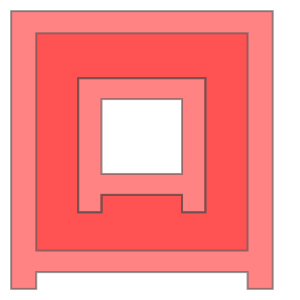

In [148]:
MultiPolygon(donuts)

In [138]:
outline.get_outside_border()

1

In [139]:
outline

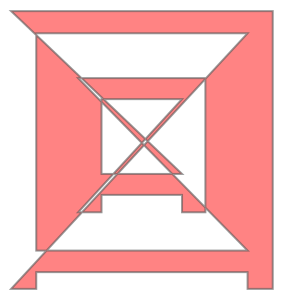

In [140]:
Polygon(point_list)

[[(228, 1600),
  (1816, 1600),
  (1816, -192),
  (1644, -192),
  (1644, -22),
  (400, -22),
  (400, -192),
  (228, -192)],
 [(1644, 128), (1644, 1450), (400, 1450), (400, 128)]]

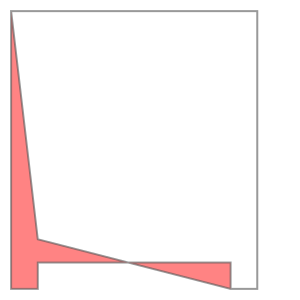

In [113]:
Polygon(shell = [(228, 1600),(1816, 1600),(1816, -192),(1644, -192),(1644, -22),(400, -22),(400, -192),(228, -192)],
          holes = [[(228, 1600),(1816, 1600),(1816, -192),(1644, -192), (400, 128)]])

In [52]:
outline.contours[:]

[7, 11]

In [66]:
dir(outline)

['_FT_Outline',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_contours',
 '_get_points',
 '_get_tags',
 '_od_conic_to_builder',
 '_od_conic_to_noop',
 '_od_cubic_to_builder',
 '_od_cubic_to_noop',
 '_od_line_to_builder',
 '_od_line_to_noop',
 '_od_move_to_builder',
 '_od_move_to_noop',
 'contours',
 'decompose',
 'flags',
 'get_bbox',
 'get_cbox',
 'get_inside_border',
 'get_outside_border',
 'n_contours',
 'n_points',
 'points',
 'tags']

In [71]:
outline.flags

0

In [63]:
outline2.

SyntaxError: invalid syntax (<ipython-input-63-300b08ed5286>, line 1)

In [ ]:
dir(outline)

In [ ]:
point_list

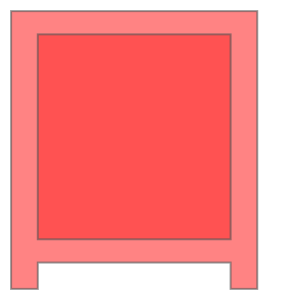

In [51]:
MultiPolygon(polygon_list)

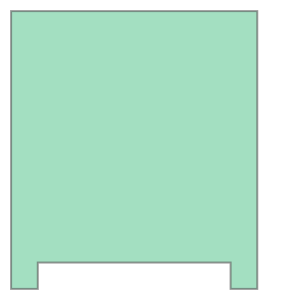

In [54]:
Polygon(point_list[:8])

In [ ]:
#导出数据
res_gdf = gpd.GeoDataFrame([Polygon(outline.points)]).rename(columns={0:'geometry'})
res_gdf = gpd.GeoDataFrame(res_gdf,crs="epsg:4326",geometry='geometry')
res_gdf.to_file('d:/yyy.shp',encoding='gbk')

In [ ]:
import freetype
 
face = freetype.Face("c:/Windows/Fonts/msyh.ttc")#微软雅黑
face.set_char_size( 48*64 )
face.load_char('交')
bitmap = face.glyph.bitmap
bitmap.buffer

In [ ]:
a = bitmap.points

In [ ]:
0x10000 * 2

In [ ]:
print(bitmap.)

In [ ]:
from freetype import *

if __name__ == '__main__':
    import numpy
    import matplotlib.pyplot as plt

    face = Face('c:/Windows/Fonts/msyhl.ttc')
    face.set_char_size( 4*48*64 )
    flags = FT_LOAD_DEFAULT | FT_LOAD_NO_BITMAP
    face.load_char('交', flags )
    slot = face.glyph
    glyph = slot.get_glyph()
    stroker = Stroker( )
    stroker.set(64, FT_STROKER_LINECAP_ROUND, FT_STROKER_LINEJOIN_ROUND, 0 )
    glyph.stroke( stroker , True )
    blyph = glyph.to_bitmap(FT_RENDER_MODE_NORMAL, Vector(0,0), True )
    bitmap = blyph.bitmap
    width, rows, pitch = bitmap.width, bitmap.rows, bitmap.pitch
    top, left = blyph.top, blyph.left
    data = []
    for i in range(rows):
        data.extend(bitmap.buffer[i*pitch:i*pitch+width])
    Z = numpy.array(data,dtype=numpy.ubyte).reshape(rows, width)
    plt.figure(figsize=(6,8))
    plt.imshow(Z, interpolation='nearest', cmap=plt.cm.gray_r, origin='lower')
    plt.show()

In [ ]:
  
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# -----------------------------------------------------------------------------
#
#  FreeType high-level python API - Copyright 2011-2015 Nicolas P. Rougier
#  Distributed under the terms of the new BSD license.
#
# -----------------------------------------------------------------------------
import numpy
import os, sys
from freetype import *


class ColorMap:
    ''' A colormap is used to map scalar values to colors. It is build by
        adding couples of (value,color) where value must be between 0 and 1.
        The 'scale' method allows to specify the range of the colormap and
        the 'color' method then returns a color for any value. '''

    def __init__ (self, colors):
        self.colors = colors
        self.min    = 0
        self.max    = 1

    def scale (self, min, max):
        self.min, self.max = min,max

    def color (self, value):
        ''' Return the color corresponding to value. '''
        if not len(self.colors):
            return (0,0,0)
        elif len(self.colors) == 1:
            return self.colors[0][1]
        elif value < self.min:
            return self.colors[0][1]
        elif value > self.max:
            return self.colors[-1][1]
        value = (value-self.min)/(self.max-self.min)
        sup_color = self.colors[0]
        inf_color = self.colors[-1]
        for i in range (len(self.colors)-1):
            if value < self.colors[i+1][0]:
                inf_color = self.colors[i]
                sup_color = self.colors[i+1]
                break
        r = (value-inf_color[0]) / (sup_color[0] - inf_color[0])
        if r < 0: r = -r
        color = [sup_color[1][0]*r + inf_color[1][0]*(1-r),
                 sup_color[1][1]*r + inf_color[1][1]*(1-r),
                 sup_color[1][2]*r + inf_color[1][2]*(1-r)]
        return color

# Some colormaps
CM_IceAndFire = ColorMap([(0.00, (0.0, 0.0, 1.0)),
                         (0.25, (0.0, 0.5, 1.0)),
                         (0.50, (1.0, 1.0, 1.0)),
                         (0.75, (1.0, 1.0, 0.0)),
                         (1.00, (1.0, 0.0, 0.0))])
CM_Ice = ColorMap([(0.00, (0.0, 0.0, 1.0)),
                   (0.50, (0.5, 0.5, 1.0)),
                   (1.00, (1.0, 1.0, 1.0))])
CM_Fire = ColorMap([(0.00, (1.0, 1.0, 1.0)),
                    (0.50, (1.0, 1.0, 0.0)),
                    (1.00, (1.0, 0.0, 0.0))])
CM_Hot = ColorMap([(0.00, (0.0, 0.0, 0.0)),
                   (0.33, (1.0, 0.0, 0.0)),
                   (0.66, (1.0, 1.0, 0.0)),
                   (1.00, (1.0, 1.0, 1.0))])
CM_Grey = ColorMap([(0.00, (0.0, 0.0, 0.0)),
                    (1.00, (1.0, 1.0, 1.0))])



def imshow (Z, vmin=None, vmax=None, cmap=CM_Hot, show_cmap=False):
    ''' Show a 2D numpy array using terminal colors '''

    if len(Z.shape) != 2:
        print ("Cannot display non 2D array")
        return

    vmin = vmin or Z.min()
    vmax = vmax or Z.max()
    cmap.scale (vmin, vmax)

    # Build initialization string that setup terminal colors
    init = ''
    for i in range(240):
        v = cmap.min + (i/240.0)* (cmap.max - cmap.min)
        r,g,b = cmap.color (v)
        init += "\x1b]4;%d;rgb:%02x/%02x/%02x\x1b\\" % (16+i, int(r*255),int(g*255),int(b*255))

    # Build array data string
    data = ''
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            c = 16 + int( ((Z[Z.shape[0]-i-1,j]-cmap.min) / (cmap.max-cmap.min))*239)
            if (c < 16):
                c=16
            elif (c > 255):
                c=255
            data += "\x1b[48;5;%dm  " % c
            u = cmap.max - (i/float(Z.shape[0]-1)) * ((cmap.max-cmap.min))
        if show_cmap:
            data += "\x1b[0m  "
            data += "\x1b[48;5;%dm  " % (16 + (1-i/float(Z.shape[0]))*239)
            data += "\x1b[0m %+.2f" % u
        data += "\x1b[0m\n"
    print (init+data[:-1]+'\x1b[0m')


if __name__ == '__main__':
    face = Face('c:/Windows/Fonts/msyh.ttc')
    face.set_char_size( 32*64 )
    face.load_glyph(face.get_char_index('S'))
    slot = face.glyph
    bitmap = slot.bitmap
    data, rows, width = bitmap.buffer, bitmap.rows, bitmap.width
    Z = numpy.array(data,dtype=float).reshape(rows,width)
    Z = Z[::-1,:]
    imshow (Z, cmap=CM_Grey)


In [ ]:
import freetype
face = freetype.Face("C:/Windows/Fonts/VINERITC.TTF")
face.set_char_size( 48*64 )
face.load_char(text)
bitmap = face.glyph.outline

In [ ]:
Polygon(bitmap.points)

In [ ]:
from ttfquery import describe
from ttfquery import glyphquery
import ttfquery.glyph as glyph
char = "a"
font_url =r"C:\Windows\Fonts\arial.ttf"
font = describe.openFont(font_url)
g = glyph.Glyph(char) # or g = glyph.Glyph(glyphquery.glyphName(font, char))

In [ ]:
contours = g.calculateContours(font) 

In [ ]:
from ttfquery import describe, glyphquery, glyph
f = describe.openFont(r"C:\Windows\Fonts\arial.ttf")
n = glyphquery.glyphName(f, 'D')
g = glyph.Glyph(n)
c = g.calculateContours(f)
o = glyph.decomposeOutline(c[1])

In [ ]:
from shapely.geometry import Polygon,Point,LineString,MultiPolygon, MultiPoint
from freetype import *
face = Face(r'C:\Windows\Fonts\arial.ttf')
flags = FT_LOAD_DEFAULT | FT_LOAD_NO_BITMAP
face.set_char_size( 32*64  )
face.load_char('k', flags )
slot = face.glyph
outline = slot.outline
Polygon(outline.points)

In [ ]:
import freetype
face = freetype.Face(r'C:\Windows\Fonts\arial.ttf')
face.set_char_size( 48*64 )
face.load_char('S')
bitmap = face.glyph.bitmap
print (bitmap.buffer)